In [1]:
#Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importación de datos
dat = pd.read_csv('Grupo5.txt', sep='\t', header=0)

#Ajuste de unidades
dat['Boiler Pres (kPa)'] = dat['Boiler Pres (psig)']*6.895
dat['Turbine In Pres (kPa)'] = dat['Turbine In Pres (psig)']*6.895
dat['Turbine Ex Pres (kPa)'] = dat['Turbine Ex Pres (psig)']*6.895 
dat = dat.drop(columns=['Boiler Pres (psig)', 'Turbine In Pres (psig)', 'Turbine Ex Pres (psig)'])
dat.reset_index(drop=True, inplace=True)
dat['Time (sec)'] = dat.index
dat['Time (sec)'] = dat.index + 1

#Filtrando el dataframe para obtener los datos de los 10 minutos del estado estacionario
datfil = dat.iloc[1555:2155].reset_index(drop=True)
datfil.reset_index(drop=True, inplace=True)
datfil['Time (sec)'] = datfil.index
datfil['Time (sec)'] = datfil.index + 1

datfil

,Time (sec),Boiler Temp (C),Turbine In Temp (C),Turbine Ex Temp (C),Fuel Flow (L/min),Generator (RPM),Voltage (Volts),Current (Amps),Power (Watts),Boiler Pres (kPa),Turbine In Pres (kPa),Turbine Ex Pres (kPa)
0,1,176.628,118.463,95.649,4.942,2018.150,7.699,0.321,2.471,806.721895,112.884940,35.785050
1,2,176.683,118.397,95.856,4.943,1992.242,7.602,0.317,2.408,806.708105,112.843570,35.805735
2,3,176.629,118.361,95.812,4.942,2016.734,7.694,0.321,2.467,806.611575,112.595350,35.764365
3,4,176.472,118.342,95.970,4.939,2036.268,7.771,0.324,2.519,806.694315,112.540190,35.771260
4,5,176.446,118.364,95.841,4.924,2029.393,7.742,0.323,2.500,806.521940,112.671195,35.757470
...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,175.951,118.359,97.730,4.963,1756.016,6.717,0.279,1.876,784.306250,109.458125,34.054405
596,597,176.008,118.384,97.650,4.964,1752.553,6.704,0.279,1.868,784.464835,109.602920,34.233675
597,598,175.935,118.367,97.802,4.953,1754.424,6.712,0.279,1.872,784.292460,109.561550,34.116460
598,599,175.963,118.377,97.784,4.941,1752.107,6.704,0.279,1.868,784.416570,109.589130,34.240570


Gráficas de las variables de interés

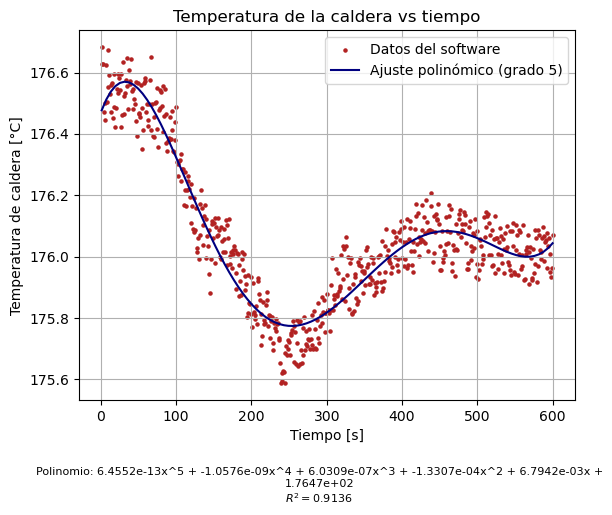

In [3]:
#Análisis de línea de tendencia
g = 5
coef = np.polyfit(datfil['Time (sec)'], datfil['Boiler Temp (C)'], g)
pol = np.poly1d(coef)
y_pred = pol(datfil['Time (sec)'])

#Ecuación del polinomio
def ecpolinom(coef):
    terms = []
    degree = len(coef) - 1
    for i, c in enumerate(coef):
        power = degree - i
        if power == 0:
            terms.append(f"{c:.4e}")
        elif power == 1:
            terms.append(f"{c:.4e}x")
        else:
            terms.append(f"{c:.4e}x^{power}")
    return " + ".join(terms)
poly_eq = ecpolinom(coef)

ss_res = np.sum((datfil['Boiler Temp (C)'] - y_pred) ** 2)  
ss_tot = np.sum((datfil['Boiler Temp (C)'] - np.mean(datfil['Boiler Temp (C)'])) ** 2)  
r2b = 1 - (ss_res / ss_tot)
r2txt = f"$R^2 = {r2b:.4f}$"

x_fit = np.linspace(datfil['Time (sec)'].min(), datfil['Time (sec)'].max(), 100)
y_fit = pol(x_fit)

#Gráfica de datos originales
plt.scatter(datfil['Time (sec)'], datfil['Boiler Temp (C)'], label = 'Datos del software', s = 5, color = 'firebrick')
plt.figtext(0.5, -0.1, f"Polinomio: {poly_eq}\n{r2txt}", wrap=True, horizontalalignment='center', fontsize=8)
plt.plot(x_fit, y_fit, color = 'navy', label=f'Ajuste polinómico (grado {g})')
plt.title('Temperatura de la caldera vs tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura de caldera [°C]')
plt.legend()
plt.grid()
plt.show()


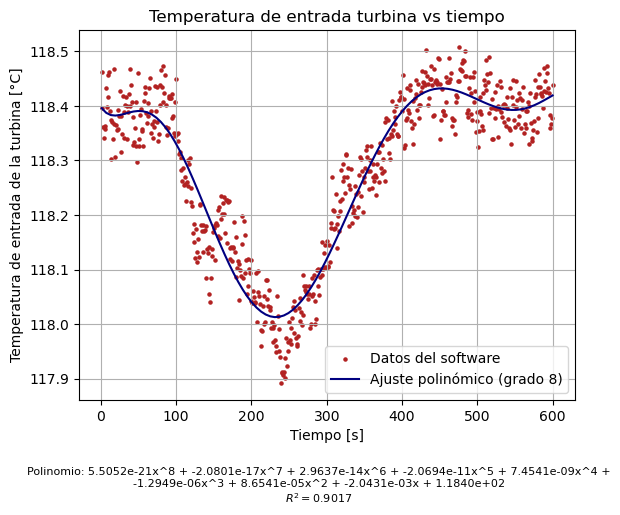

In [4]:
#Análisis de línea de tendencia
g = 8
coef = np.polyfit(datfil['Time (sec)'], datfil['Turbine In Temp (C)'], g)
pol = np.poly1d(coef)
y_pred = pol(datfil['Time (sec)'])

#Ecuación del polinomio
def ecpolinom(coef):
    terms = []
    degree = len(coef) - 1
    for i, c in enumerate(coef):
        power = degree - i
        if power == 0:
            terms.append(f"{c:.4e}")
        elif power == 1:
            terms.append(f"{c:.4e}x")
        else:
            terms.append(f"{c:.4e}x^{power}")
    return " + ".join(terms)
poly_eq = ecpolinom(coef)

ss_res = np.sum((datfil['Turbine In Temp (C)'] - y_pred) ** 2)  
ss_tot = np.sum((datfil['Turbine In Temp (C)'] - np.mean(datfil['Turbine In Temp (C)'])) ** 2)  
r2b = 1 - (ss_res / ss_tot)
r2txt = f"$R^2 = {r2b:.4f}$"

x_fit = np.linspace(datfil['Time (sec)'].min(), datfil['Time (sec)'].max(), 100)
y_fit = pol(x_fit)

#Gráfica de datos originales
plt.scatter(datfil['Time (sec)'], datfil['Turbine In Temp (C)'], label = 'Datos del software', s = 5, color = 'firebrick')
plt.figtext(0.5, -0.1, f"Polinomio: {poly_eq}\n{r2txt}", wrap=True, horizontalalignment='center', fontsize=8)
plt.plot(x_fit, y_fit, color = 'navy', label=f'Ajuste polinómico (grado {g})')
plt.title('Temperatura de entrada turbina vs tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura de entrada de la turbina [°C]')
plt.legend()
plt.grid()
plt.show()

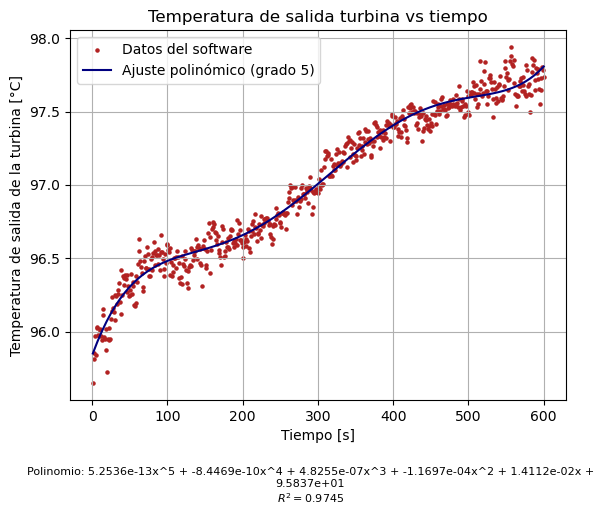

In [5]:
#Análisis de línea de tendencia
g = 5
coef = np.polyfit(datfil['Time (sec)'], datfil['Turbine Ex Temp (C)'], g)
pol = np.poly1d(coef)
y_pred = pol(datfil['Time (sec)'])

#Ecuación del polinomio
def ecpolinom(coef):
    terms = []
    degree = len(coef) - 1
    for i, c in enumerate(coef):
        power = degree - i
        if power == 0:
            terms.append(f"{c:.4e}")
        elif power == 1:
            terms.append(f"{c:.4e}x")
        else:
            terms.append(f"{c:.4e}x^{power}")
    return " + ".join(terms)
poly_eq = ecpolinom(coef)

ss_res = np.sum((datfil['Turbine Ex Temp (C)'] - y_pred) ** 2)  
ss_tot = np.sum((datfil['Turbine Ex Temp (C)'] - np.mean(datfil['Turbine Ex Temp (C)'])) ** 2)  
r2b = 1 - (ss_res / ss_tot)
r2txt = f"$R^2 = {r2b:.4f}$"

x_fit = np.linspace(datfil['Time (sec)'].min(), datfil['Time (sec)'].max(), 100)
y_fit = pol(x_fit)

#Gráfica de datos originales
plt.scatter(datfil['Time (sec)'], datfil['Turbine Ex Temp (C)'], label = 'Datos del software', s = 5, color = 'firebrick')
plt.figtext(0.5, -0.1, f"Polinomio: {poly_eq}\n{r2txt}", wrap=True, horizontalalignment='center', fontsize=8)
plt.plot(x_fit, y_fit, color = 'navy', label=f'Ajuste polinómico (grado {g})')
plt.title('Temperatura de salida turbina vs tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura de salida de la turbina [°C]')
plt.legend()
plt.grid()
plt.show()

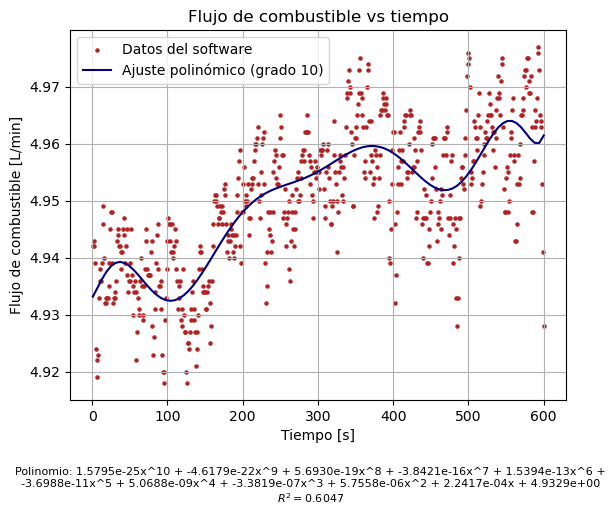

In [6]:
#Análisis de línea de tendencia
g = 10
coef = np.polyfit(datfil['Time (sec)'], datfil['Fuel Flow (L/min)'], g)
pol = np.poly1d(coef)
y_pred = pol(datfil['Time (sec)'])

#Ecuación del polinomio
def ecpolinom(coef):
    terms = []
    degree = len(coef) - 1
    for i, c in enumerate(coef):
        power = degree - i
        if power == 0:
            terms.append(f"{c:.4e}")
        elif power == 1:
            terms.append(f"{c:.4e}x")
        else:
            terms.append(f"{c:.4e}x^{power}")
    return " + ".join(terms)
poly_eq = ecpolinom(coef)

ss_res = np.sum((datfil['Fuel Flow (L/min)'] - y_pred) ** 2)  
ss_tot = np.sum((datfil['Fuel Flow (L/min)'] - np.mean(datfil['Fuel Flow (L/min)'])) ** 2)  
r2b = 1 - (ss_res / ss_tot)
r2txt = f"$R^2 = {r2b:.4f}$"

x_fit = np.linspace(datfil['Time (sec)'].min(), datfil['Time (sec)'].max(), 100)
y_fit = pol(x_fit)

#Gráfica de datos originales
plt.scatter(datfil['Time (sec)'], datfil['Fuel Flow (L/min)'], label = 'Datos del software', s = 5, color = 'firebrick')
plt.figtext(0.5, -0.1, f"Polinomio: {poly_eq}\n{r2txt}", wrap=True, horizontalalignment='center', fontsize=8)
plt.plot(x_fit, y_fit, color = 'navy', label=f'Ajuste polinómico (grado {g})')
plt.title('Flujo de combustible vs tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Flujo de combustible [L/min]')
plt.legend()
plt.grid()
plt.show()

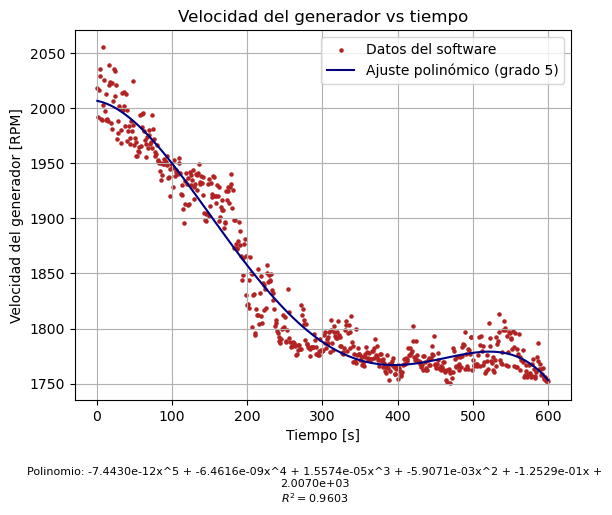

In [7]:
#Análisis de línea de tendencia
g = 5
coef = np.polyfit(datfil['Time (sec)'], datfil['Generator (RPM)'], g)
pol = np.poly1d(coef)
y_pred = pol(datfil['Time (sec)'])

#Ecuación del polinomio
def ecpolinom(coef):
    terms = []
    degree = len(coef) - 1
    for i, c in enumerate(coef):
        power = degree - i
        if power == 0:
            terms.append(f"{c:.4e}")
        elif power == 1:
            terms.append(f"{c:.4e}x")
        else:
            terms.append(f"{c:.4e}x^{power}")
    return " + ".join(terms)
poly_eq = ecpolinom(coef)

ss_res = np.sum((datfil['Generator (RPM)'] - y_pred) ** 2)  
ss_tot = np.sum((datfil['Generator (RPM)'] - np.mean(datfil['Generator (RPM)'])) ** 2)  
r2b = 1 - (ss_res / ss_tot)
r2txt = f"$R^2 = {r2b:.4f}$"

x_fit = np.linspace(datfil['Time (sec)'].min(), datfil['Time (sec)'].max(), 100)
y_fit = pol(x_fit)

#Gráfica de datos originales
plt.scatter(datfil['Time (sec)'], datfil['Generator (RPM)'], label = 'Datos del software', s = 5, color = 'firebrick')
plt.figtext(0.5, -0.1, f"Polinomio: {poly_eq}\n{r2txt}", wrap=True, horizontalalignment='center', fontsize=8)
plt.plot(x_fit, y_fit, color = 'navy', label=f'Ajuste polinómico (grado {g})')
plt.title('Velocidad del generador vs tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad del generador [RPM]')
plt.legend()
plt.grid()
plt.show()

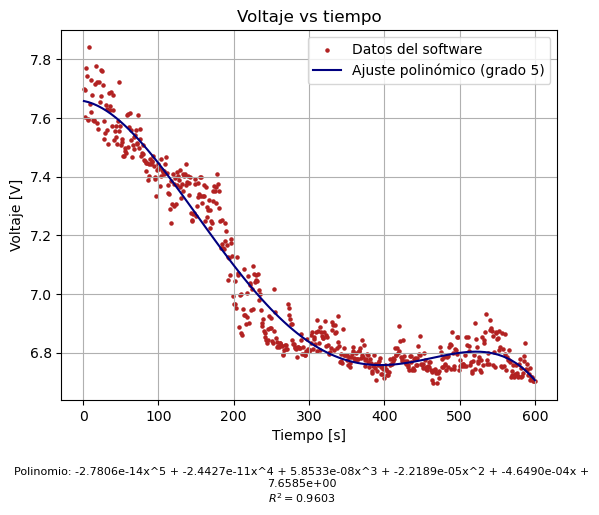

In [8]:
#Análisis de línea de tendencia
g = 5
coef = np.polyfit(datfil['Time (sec)'], datfil['Voltage (Volts)'], g)
pol = np.poly1d(coef)
y_pred = pol(datfil['Time (sec)'])

#Ecuación del polinomio
def ecpolinom(coef):
    terms = []
    degree = len(coef) - 1
    for i, c in enumerate(coef):
        power = degree - i
        if power == 0:
            terms.append(f"{c:.4e}")
        elif power == 1:
            terms.append(f"{c:.4e}x")
        else:
            terms.append(f"{c:.4e}x^{power}")
    return " + ".join(terms)
poly_eq = ecpolinom(coef)

ss_res = np.sum((datfil['Voltage (Volts)'] - y_pred) ** 2)  
ss_tot = np.sum((datfil['Voltage (Volts)'] - np.mean(datfil['Voltage (Volts)'])) ** 2)  
r2b = 1 - (ss_res / ss_tot)
r2txt = f"$R^2 = {r2b:.4f}$"

x_fit = np.linspace(datfil['Time (sec)'].min(), datfil['Time (sec)'].max(), 100)
y_fit = pol(x_fit)

#Gráfica de datos originales
plt.scatter(datfil['Time (sec)'], datfil['Voltage (Volts)'], label = 'Datos del software', s = 5, color = 'firebrick')
plt.figtext(0.5, -0.1, f"Polinomio: {poly_eq}\n{r2txt}", wrap=True, horizontalalignment='center', fontsize=8)
plt.plot(x_fit, y_fit, color = 'navy', label=f'Ajuste polinómico (grado {g})')
plt.title('Voltaje vs tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.legend()
plt.grid()
plt.show()

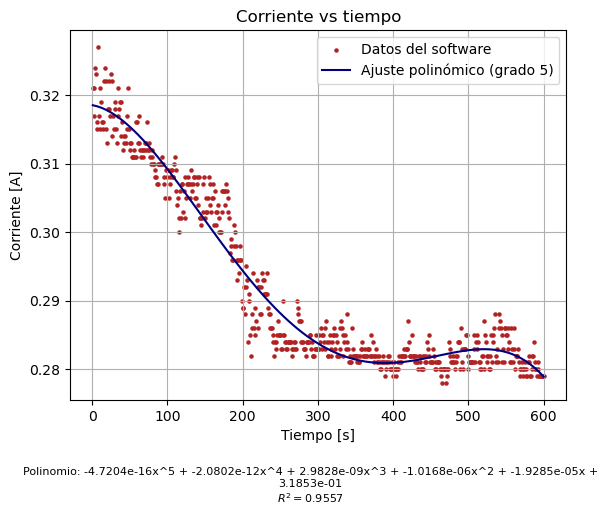

In [9]:
#Análisis de línea de tendencia
g = 5
coef = np.polyfit(datfil['Time (sec)'], datfil['Current (Amps)'], g)
pol = np.poly1d(coef)
y_pred = pol(datfil['Time (sec)'])

#Ecuación del polinomio
def ecpolinom(coef):
    terms = []
    degree = len(coef) - 1
    for i, c in enumerate(coef):
        power = degree - i
        if power == 0:
            terms.append(f"{c:.4e}")
        elif power == 1:
            terms.append(f"{c:.4e}x")
        else:
            terms.append(f"{c:.4e}x^{power}")
    return " + ".join(terms)
poly_eq = ecpolinom(coef)

ss_res = np.sum((datfil['Current (Amps)'] - y_pred) ** 2)  
ss_tot = np.sum((datfil['Current (Amps)'] - np.mean(datfil['Current (Amps)'])) ** 2)  
r2b = 1 - (ss_res / ss_tot)
r2txt = f"$R^2 = {r2b:.4f}$"

x_fit = np.linspace(datfil['Time (sec)'].min(), datfil['Time (sec)'].max(), 100)
y_fit = pol(x_fit)

#Gráfica de datos originales
plt.scatter(datfil['Time (sec)'], datfil['Current (Amps)'], label = 'Datos del software', s = 5, color = 'firebrick')
plt.figtext(0.5, -0.1, f"Polinomio: {poly_eq}\n{r2txt}", wrap=True, horizontalalignment='center', fontsize=8)
plt.plot(x_fit, y_fit, color = 'navy', label=f'Ajuste polinómico (grado {g})')
plt.title('Corriente vs tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Corriente [A]')
plt.legend()
plt.grid()
plt.show()

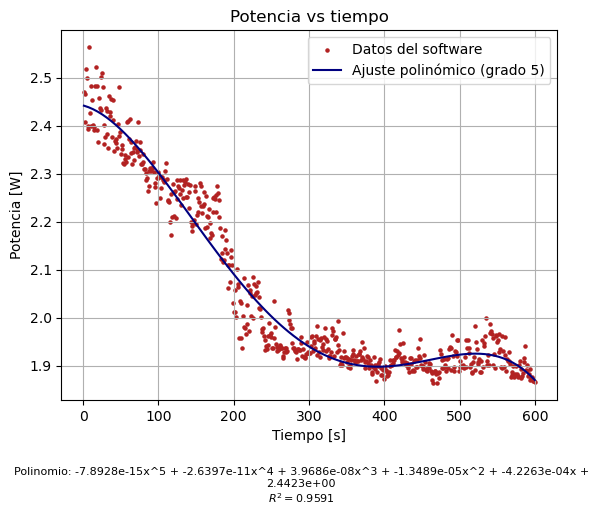

In [10]:
#Análisis de línea de tendencia
g = 5
coef = np.polyfit(datfil['Time (sec)'], datfil['Power (Watts)'], g)
pol = np.poly1d(coef)
y_pred = pol(datfil['Time (sec)'])

#Ecuación del polinomio
def ecpolinom(coef):
    terms = []
    degree = len(coef) - 1
    for i, c in enumerate(coef):
        power = degree - i
        if power == 0:
            terms.append(f"{c:.4e}")
        elif power == 1:
            terms.append(f"{c:.4e}x")
        else:
            terms.append(f"{c:.4e}x^{power}")
    return " + ".join(terms)
poly_eq = ecpolinom(coef)

ss_res = np.sum((datfil['Power (Watts)'] - y_pred) ** 2)  
ss_tot = np.sum((datfil['Power (Watts)'] - np.mean(datfil['Power (Watts)'])) ** 2)  
r2b = 1 - (ss_res / ss_tot)
r2txt = f"$R^2 = {r2b:.4f}$"

x_fit = np.linspace(datfil['Time (sec)'].min(), datfil['Time (sec)'].max(), 100)
y_fit = pol(x_fit)

#Gráfica de datos originales
plt.scatter(datfil['Time (sec)'], datfil['Power (Watts)'], label = 'Datos del software', s=5, color = 'firebrick')
plt.figtext(0.5, -0.1, f"Polinomio: {poly_eq}\n{r2txt}", wrap=True, horizontalalignment='center', fontsize=8)
plt.plot(x_fit, y_fit, color = 'navy', label=f'Ajuste polinómico (grado {g})')
plt.title('Potencia vs tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Potencia [W]')
plt.legend()
plt.grid()
plt.show()

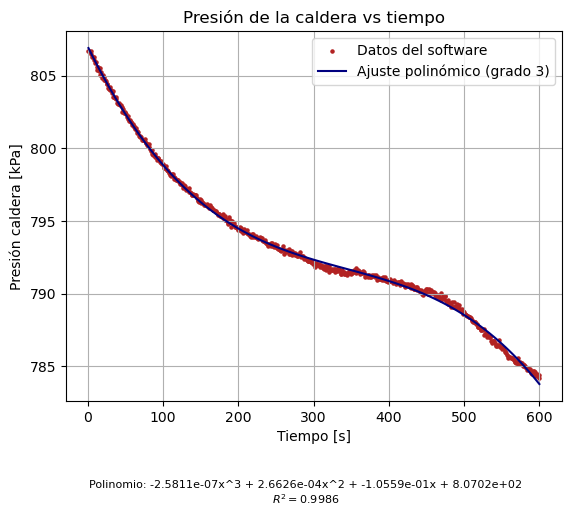

In [11]:
#Análisis de línea de tendencia
g = 3
coef = np.polyfit(datfil['Time (sec)'], datfil['Boiler Pres (kPa)'], g)
pol = np.poly1d(coef)
y_pred = pol(datfil['Time (sec)'])

#Ecuación del polinomio
def ecpolinom(coef):
    terms = []
    degree = len(coef) - 1
    for i, c in enumerate(coef):
        power = degree - i
        if power == 0:
            terms.append(f"{c:.4e}")
        elif power == 1:
            terms.append(f"{c:.4e}x")
        else:
            terms.append(f"{c:.4e}x^{power}")
    return " + ".join(terms)
poly_eq = ecpolinom(coef)

ss_res = np.sum((datfil['Boiler Pres (kPa)'] - y_pred) ** 2)  
ss_tot = np.sum((datfil['Boiler Pres (kPa)'] - np.mean(datfil['Boiler Pres (kPa)'])) ** 2)  
r2b = 1 - (ss_res / ss_tot)
r2txt = f"$R^2 = {r2b:.4f}$"

x_fit = np.linspace(datfil['Time (sec)'].min(), datfil['Time (sec)'].max(), 100)
y_fit = pol(x_fit)

#Gráfica de datos originales
plt.scatter(datfil['Time (sec)'], datfil['Boiler Pres (kPa)'], label = 'Datos del software', s=5, color = 'firebrick')
plt.figtext(0.5, -0.1, f"Polinomio: {poly_eq}\n{r2txt}", wrap=True, horizontalalignment='center', fontsize=8)
plt.plot(x_fit, y_fit, color = 'navy', label=f'Ajuste polinómico (grado {g})')
plt.title('Presión de la caldera vs tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Presión caldera [kPa]')
plt.legend()
plt.grid()
plt.show()

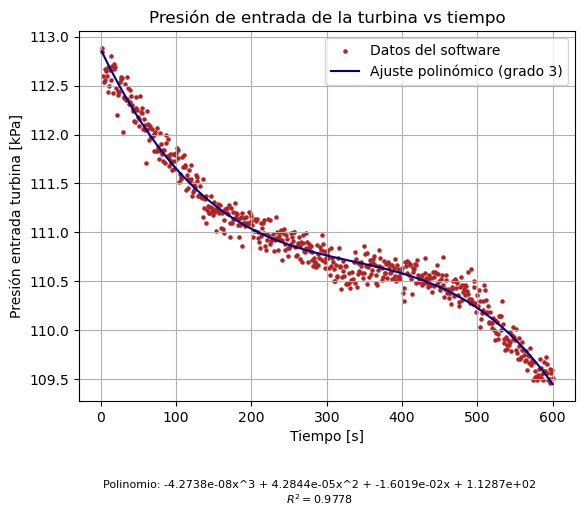

In [12]:
#Análisis de línea de tendencia
g = 3
coef = np.polyfit(datfil['Time (sec)'], datfil['Turbine In Pres (kPa)'], g)
pol = np.poly1d(coef)
y_pred = pol(datfil['Time (sec)'])

#Ecuación del polinomio
def ecpolinom(coef):
    terms = []
    degree = len(coef) - 1
    for i, c in enumerate(coef):
        power = degree - i
        if power == 0:
            terms.append(f"{c:.4e}")
        elif power == 1:
            terms.append(f"{c:.4e}x")
        else:
            terms.append(f"{c:.4e}x^{power}")
    return " + ".join(terms)
poly_eq = ecpolinom(coef)

ss_res = np.sum((datfil['Turbine In Pres (kPa)'] - y_pred) ** 2)  
ss_tot = np.sum((datfil['Turbine In Pres (kPa)'] - np.mean(datfil['Turbine In Pres (kPa)'])) ** 2)  
r2b = 1 - (ss_res / ss_tot)
r2txt = f"$R^2 = {r2b:.4f}$"

x_fit = np.linspace(datfil['Time (sec)'].min(), datfil['Time (sec)'].max(), 100)
y_fit = pol(x_fit)

#Gráfica de datos originales
plt.scatter(datfil['Time (sec)'], datfil['Turbine In Pres (kPa)'], label = 'Datos del software', s=5, color = 'firebrick')
plt.figtext(0.5, -0.1, f"Polinomio: {poly_eq}\n{r2txt}", wrap=True, horizontalalignment='center', fontsize=8)
plt.plot(x_fit, y_fit, color = 'navy', label=f'Ajuste polinómico (grado {g})')
plt.title('Presión de entrada de la turbina vs tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Presión entrada turbina [kPa]')
plt.legend()
plt.grid()
plt.show()

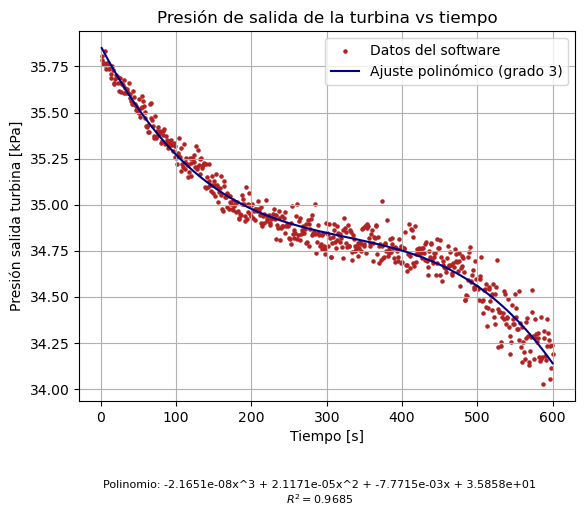

In [13]:
#Análisis de línea de tendencia
g = 3
coef = np.polyfit(datfil['Time (sec)'], datfil['Turbine Ex Pres (kPa)'], g)
pol = np.poly1d(coef)
y_pred = pol(datfil['Time (sec)'])

#Ecuación del polinomio
def ecpolinom(coef):
    terms = []
    degree = len(coef) - 1
    for i, c in enumerate(coef):
        power = degree - i
        if power == 0:
            terms.append(f"{c:.4e}")
        elif power == 1:
            terms.append(f"{c:.4e}x")
        else:
            terms.append(f"{c:.4e}x^{power}")
    return " + ".join(terms)
poly_eq = ecpolinom(coef)

ss_res = np.sum((datfil['Turbine Ex Pres (kPa)'] - y_pred) ** 2)  
ss_tot = np.sum((datfil['Turbine Ex Pres (kPa)'] - np.mean(datfil['Turbine Ex Pres (kPa)'])) ** 2)  
r2b = 1 - (ss_res / ss_tot)
r2txt = f"$R^2 = {r2b:.4f}$"

x_fit = np.linspace(datfil['Time (sec)'].min(), datfil['Time (sec)'].max(), 100)
y_fit = pol(x_fit)

#Gráfica de datos originales
plt.scatter(datfil['Time (sec)'], datfil['Turbine Ex Pres (kPa)'], label = 'Datos del software', s=5, color = 'firebrick')
plt.figtext(0.5, -0.1, f"Polinomio: {poly_eq}\n{r2txt}", wrap=True, horizontalalignment='center', fontsize=8)
plt.plot(x_fit, y_fit, color = 'navy', label=f'Ajuste polinómico (grado {g})')
plt.title('Presión de salida de la turbina vs tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Presión salida turbina [kPa]')
plt.legend()
plt.grid()
plt.show()

Eficiencia de la caldera, la eficiencia isentrópica del sistema turbina-generador, la 
eficiencia del sistema turbina-generador y la eficiencia térmica del ciclo.